In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import wrangle
import explore

In [2]:
def get_kickstarter_data():
    '''
    Grab our data from path and read as dataframe
    '''
    
    df = pd.read_csv('KickStarter.csv')
    
    return df

In [3]:
df = get_kickstarter_data()

In [4]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
df.currency.value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [8]:
def missing_zero_values_table(df):
    '''This function will look at any data set and report back on zeros and nulls for every column while also giving percentages of total values
        and also the data types. The message prints out the shape of the data frame and also tells you how many columns have nulls '''
    zero_val = (df == 0.00).astype(int).sum(axis=0)
    null_count = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mz_table = pd.concat([zero_val, null_count, mis_val_percent], axis=1)
    mz_table = mz_table.rename(
    columns = {0 : 'Zero Values', 1 : 'null_count', 2 : '% of Total Values'})
    mz_table['Total Zeroes + Null Values'] = mz_table['Zero Values'] + mz_table['null_count']
    mz_table['% Total Zero + Null Values'] = 100 * mz_table['Total Zeroes + Null Values'] / len(df)
    mz_table['Data Type'] = df.dtypes
    mz_table = mz_table[
        mz_table.iloc[:,1] >= 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns and " + str(df.shape[0]) + " Rows.\n"      
            "There are " +  str((mz_table['null_count'] != 0).sum()) +
          " columns that have NULL values.")
    return mz_table

In [9]:
mz_table = missing_zero_values_table(df)

Your selected dataframe has 15 columns and 378661 Rows.
There are 2 columns that have NULL values.


In [10]:
mz_table.head(15)

,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
usd pledged,68112,3797,1.0,71909,19.0,float64
name,0,4,0.0,4,0.0,object
ID,0,0,0.0,0,0.0,int64
category,0,0,0.0,0,0.0,object
main_category,0,0,0.0,0,0.0,object
currency,0,0,0.0,0,0.0,object
deadline,0,0,0.0,0,0.0,object
goal,0,0,0.0,0,0.0,float64
launched,0,0,0.0,0,0.0,object
pledged,52527,0,0.0,52527,13.9,float64


In [11]:
df.name.isnull().sum()

4

In [12]:
df['usd pledged'].isnull().sum()

3797

In [13]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [14]:
df.shape

(378661, 15)

In [15]:
def handle_missing_values(df, prop_required_column = .5, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df

In [16]:
df = handle_missing_values(df, prop_required_column = .5, prop_required_row = 1)

In [17]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [18]:
df.shape

(374860, 15)

In [19]:
378661 - 374860

3801

In [20]:
mz_table = missing_zero_values_table(df)

Your selected dataframe has 15 columns and 374860 Rows.
There are 0 columns that have NULL values.


In [21]:
mz_table 

,Zero Values,null_count,% of Total Values,Total Zeroes + Null Values,% Total Zero + Null Values,Data Type
ID,0,0,0.0,0,0.0,int64
name,0,0,0.0,0,0.0,object
category,0,0,0.0,0,0.0,object
main_category,0,0,0.0,0,0.0,object
currency,0,0,0.0,0,0.0,object
deadline,0,0,0.0,0,0.0,object
goal,0,0,0.0,0,0.0,float64
launched,0,0,0.0,0,0.0,object
pledged,51808,0,0.0,51808,13.8,float64
state,0,0,0.0,0,0.0,object


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374860 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374860 non-null  object 
 3   main_category     374860 non-null  object 
 4   currency          374860 non-null  object 
 5   deadline          374860 non-null  object 
 6   goal              374860 non-null  float64
 7   launched          374860 non-null  object 
 8   pledged           374860 non-null  float64
 9   state             374860 non-null  object 
 10  backers           374860 non-null  int64  
 11  country           374860 non-null  object 
 12  usd pledged       374860 non-null  float64
 13  usd_pledged_real  374860 non-null  float64
 14  usd_goal_real     374860 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [23]:
df = df.drop(columns = ['pledged', 'usd pledged', 'goal'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374860 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374860 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374860 non-null  object 
 3   main_category     374860 non-null  object 
 4   currency          374860 non-null  object 
 5   deadline          374860 non-null  object 
 6   launched          374860 non-null  object 
 7   state             374860 non-null  object 
 8   backers           374860 non-null  int64  
 9   country           374860 non-null  object 
 10  usd_pledged_real  374860 non-null  float64
 11  usd_goal_real     374860 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 37.2+ MB


<AxesSubplot:>

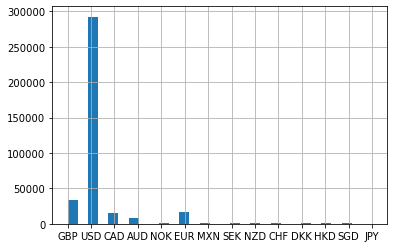

In [25]:
df.currency.hist(bins= 30)

<AxesSubplot:>

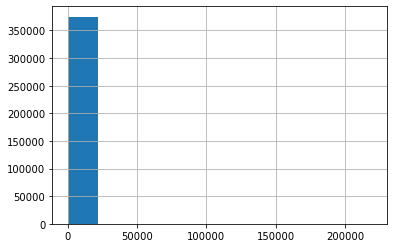

In [26]:
df.backers.hist()

In [27]:
df.state.value_counts()

failed        197611
successful    133851
canceled       38757
live            2798
suspended       1843
Name: state, dtype: int64

<AxesSubplot:>

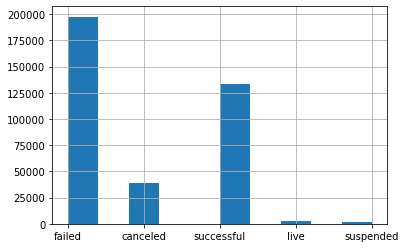

In [28]:
df.state.hist()

In [29]:
df.drop(df.index[df['state'] == 'canceled'], inplace = True)
df.drop(df.index[df['state'] == 'live'], inplace = True)
df.drop(df.index[df['state'] == 'suspended'], inplace = True)

In [30]:
df.state.value_counts()

failed        197611
successful    133851
Name: state, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                331462 non-null  int64  
 1   name              331462 non-null  object 
 2   category          331462 non-null  object 
 3   main_category     331462 non-null  object 
 4   currency          331462 non-null  object 
 5   deadline          331462 non-null  object 
 6   launched          331462 non-null  object 
 7   state             331462 non-null  object 
 8   backers           331462 non-null  int64  
 9   country           331462 non-null  object 
 10  usd_pledged_real  331462 non-null  float64
 11  usd_goal_real     331462 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 32.9+ MB


In [32]:
from sklearn.model_selection import train_test_split
def data_split(df, stratify_by='state'):
    '''
    this function takes in a dataframe and splits it into 3 samples, 
    a test, which is 20% of the entire dataframe, 
    a validate, which is 24% of the entire dataframe,
    and a train, which is 56% of the entire dataframe. 
    It then splits each of the 3 samples into a dataframe with independent variables
    and a series with the dependent, or target variable. 
    The function returns 3 dataframes and 3 series:
    X_train (df) & y_train (series), X_validate & y_validate, X_test & y_test. 
    '''
    # split df into test (20%) and train_validate (80%)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123)

    # split train_validate off into train (70% of 80% = 56%) and validate (30% of 80% = 24%)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123)
    # split train into X (dataframe, drop target) & y (series, keep target only)
    X_train = train.drop(columns=['state'])
    y_train = train['state']
    
    # split validate into X (dataframe, drop target) & y (series, keep target only)
    X_validate = validate.drop(columns=['state'])
    y_validate = validate['state']
    
    # split test into X (dataframe, drop target) & y (series, keep target only)
    X_test = test.drop(columns=['state'])
    y_test = test['state']
    
    return train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test


In [33]:
train, validate, test, X_train, y_train, X_validate, y_validate, X_test, y_test = data_split(df, stratify_by='state')

In [34]:
train.shape

(185618, 12)

In [35]:
validate.shape

(79551, 12)

In [36]:
test.shape

(66293, 12)

<AxesSubplot:>

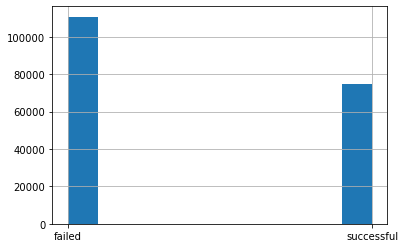

In [37]:
train.state.hist()

In [38]:
df.shape

(331462, 12)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331462 entries, 0 to 378660
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                331462 non-null  int64  
 1   name              331462 non-null  object 
 2   category          331462 non-null  object 
 3   main_category     331462 non-null  object 
 4   currency          331462 non-null  object 
 5   deadline          331462 non-null  object 
 6   launched          331462 non-null  object 
 7   state             331462 non-null  object 
 8   backers           331462 non-null  int64  
 9   country           331462 non-null  object 
 10  usd_pledged_real  331462 non-null  float64
 11  usd_goal_real     331462 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 32.9+ MB


In [43]:
# Make objects into numerics.
# Make more features (launch and deadline diff, goal/backers)

In [40]:
cat_vars = ['category','currency', 'main_category', 'country']
quant_vars = ['backers', 'deadline', 'launched', 'usd_pledged_real', 'usd_goal_real']
target = 'state'

In [41]:
from explore import explore_univariate

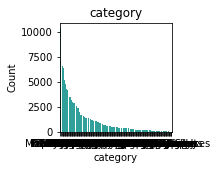

                        category  Count  Percent
Product Design      Mobile Games  10391     5.60
Documentary               Shorts   8159     4.40
Music                    Fiction   7017     3.78
Tabletop Games      Film & Video   6612     3.56
Shorts                      Jazz   6367     3.43
...                          ...    ...      ...
Residencies              Animals     38     0.02
Letterpress           Typography     26     0.01
Chiptune               Taxidermy     15     0.01
Taxidermy               Chiptune      6     0.00
Literary Spaces  Literary Spaces      4     0.00

[159 rows x 3 columns]
_________________________________________________________________


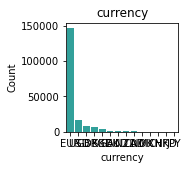

    currency   Count  Percent
USD      EUR  146418    78.88
GBP      USD   16454     8.86
EUR      GBP    8030     4.33
CAD      DKK    6874     3.70
AUD      SGD    3688     1.99
SEK      SEK     841     0.45
MXN      AUD     801     0.43
NZD      NZD     724     0.39
DKK      CAD     543     0.29
CHF      NOK     355     0.19
NOK      MXN     337     0.18
HKD      CHF     278     0.15
SGD      HKD     257     0.14
JPY      JPY      18     0.01
_________________________________________________________________


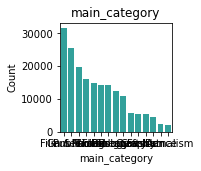

             main_category  Count  Percent
Film & Video         Games  31565    17.01
Music         Film & Video  25705    13.85
Publishing      Publishing  19865    10.70
Games                Music  16066     8.66
Technology            Food  15044     8.10
Art             Technology  14366     7.74
Design              Design  14149     7.62
Food               Theater  12445     6.70
Fashion        Photography  11078     5.97
Theater             Crafts   5709     3.08
Comics              Comics   5519     2.97
Photography        Fashion   5394     2.91
Crafts                 Art   4433     2.39
Journalism           Dance   2264     1.22
Dance           Journalism   2016     1.09
_________________________________________________________________


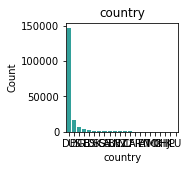

   country   Count  Percent
US      DE  146418    78.88
GB      US   16454     8.86
CA      IT    6874     3.70
AU      GB    3688     1.99
DE      ES    1895     1.02
FR      DK    1394     0.75
IT      SG    1361     0.73
NL      SE    1355     0.73
ES      AU    1067     0.57
SE      BE     841     0.45
MX      NZ     801     0.43
NZ      NL     724     0.39
DK      CA     543     0.29
IE      FR     363     0.20
CH      IE     355     0.19
NO      AT     337     0.18
BE      NO     308     0.17
HK      MX     278     0.15
SG      CH     257     0.14
AT      HK     255     0.14
LU      JP      32     0.02
JP      LU      18     0.01
_________________________________________________________________


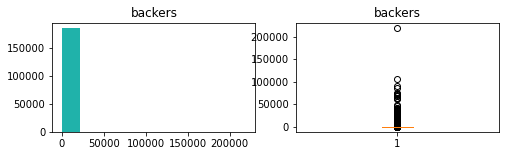

count    185618.000000
mean        115.675005
std        1011.990246
min           0.000000
25%           2.000000
50%          15.000000
75%          63.000000
max      219382.000000
Name: backers, dtype: float64


TypeError: unsupported operand type(s) for /: 'str' and 'int'

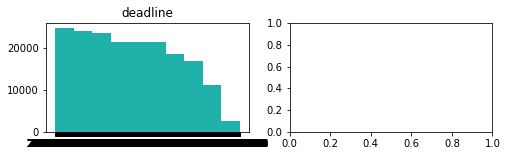

In [42]:
explore_univariate(train, cat_vars, quant_vars)